## Clustering
- Use at least two clustering algorithm on time series using an appropriate  distance.
- Analyze the clusters and highlight similarities and differences and visualize the clusters using at least 2 dimensionality reduction techniques.


- prova su dati scalati non approx
- prova su dati approssimati (ognuno con 2 distanze)
- plot sse e silohuette per trovare k cluster
- poi plotto con pca ,tsne o isomap


In [10]:
#pip install plotly==5.20.0
import plotly.express as px

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.datasets import load_gunpoint
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import cdist
from fastdtw import fastdtw
from pyts.approximation import DiscreteFourierTransform
from tslearn.clustering import silhouette_score 

In [12]:
def load_npy(filename):
    return np.load(filename)

In [13]:
def inverse_dft(time_series, initial_length):
    # Pad the time series with zeros if needed
    if len(time_series) < initial_length:
        padded_time_series = np.pad(time_series, (0, initial_length - len(time_series)), 'constant')
    else:
        padded_time_series = time_series
    
    # Apply inverse DFT
    inverse_transform = np.fft.ifft(padded_time_series)
    
    # Return the real part of the inverse transform
    return np.real(inverse_transform)

In [14]:
# Get the centroids
def getNearestTS(data, centroids):
    centroids = np.squeeze(centroids)

    # Function to calculate DTW distance between two time series
    def dtw_distance(ts1, ts2):
        distance, _ = fastdtw(ts1, ts2)
        return distance

    # Calculate the distance between each centroid and all time series data points
    distances = cdist(centroids, data, metric=dtw_distance)

    # Find the nearest time series for each centroid
    nearest_indices = np.argmin(distances, axis=1)

    # Retrieve the nearest time series for each centroid
    #nearest_time_series = [x_train_dft[i] for i in nearest_indices]

    # Print the results
    for i, centroid in enumerate(centroids):
        print (f"Centroid {i}: Nearest Time Series Index = {nearest_indices[i]}")


In [15]:
def choose_best_k(data, max_k, metric):
    sse = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric=metric)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        
        # Calculate silhouette coefficient
        labels = kmeans.labels_
        silhouette = silhouette_score(data, labels, metric='euclidean')
        silhouette_scores.append(silhouette)
    
    # Plot SSE and silhouette scores
    fig, ax1 = plt.subplots()
    ax1.plot(range(2, max_k + 1), sse, 'b-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
    ax1.tick_params('y', colors='b')
    
    ax2 = ax1.twinx()
    ax2.plot(range(2, max_k + 1), silhouette_scores, 'r-')
    ax2.set_ylabel('Silhouette Coefficient', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.title(f'Elbow Method with Silhouette Coefficient')
    plt.show()
    
    # Find the best k value
    best_k = np.argmax(silhouette_scores) + 2

LOAD AND PLOT

In [16]:
# Carica l'array di stringhe da un file di testo
y = np.loadtxt(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\y.txt', dtype=str)
y.shape
#y = LabelEncoder().fit_transform(y)

(2000,)

In [17]:
X_scal=np.load(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_scal.npy')
X_dft=np.load(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_dft.npy')
X_sax=np.load(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_sax.npy')
X_paa=np.load(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_paa.npy')

print(y.shape)
X_scal.shape, X_scal.shape, X_paa.shape, X_sax.shape, X_dft.shape

(2000,)


((2000, 1280), (2000, 1280), (2000, 320), (2000, 500), (2000, 64))

In [18]:
# #original
# X_y_ids = load_npy(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_y_ids.npz') 
# X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']


load df e split

In [19]:
# # Carica il DataFrame da un file Excel
# df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_scal.csv')
# df

In [20]:
# # Assegna la variabile target
# y = df.iloc[:, -1].values

# # Assegna il resto dei valori a X escludendo l'ultima colonna
# X = df.iloc[:, :-1].values
# X.shape, y.shape

In [21]:
# #devo cambiare la X

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

La funzione `squeeze()` in NumPy rimuove le dimensioni di grandezza 1 da un array NumPy. Quando viene chiamata senza argomenti, rimuove tutte le dimensioni di grandezza 1, riducendo così la dimensionalità dell'array. Ad esempio, se hai un array con forma (1, 10), `squeeze()` lo ridurrà a un array con forma (10). 

Nel tuo caso, `np.squeeze(x_train_sax_small)` sembra essere utilizzato per rimuovere le dimensioni di grandezza 1 da `x_train_sax_small`. Questo può essere utile se vuoi semplificare l'array o se le dimensioni aggiuntive non sono necessarie per le operazioni successive.

In [22]:
# df = pd.DataFrame(np.squeeze(X_train))
# df["genre"] = y_train

# # Escludi l'ultima colonna dal DataFrame
# df_NoGenre = df.iloc[:, :-1]

# df.head()

Ognuno di questi tre sarà provato con il K-means, usando le distanze euclidee e il Dynamic Time Warping. <br>
Andando a calcolare e plottare SEE e Silhouette andiamo a cercare il miglior k -> poi lo runniamo con quel k e proviamo a estrarre quali sono i centroidi, ed eventualmente a visualizzarli.

# RAW - x_scal


euclidean

In [23]:
max_k=10
sse_e = []
silhouette_scores_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(X_scal)
    sse_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_e = kmeans.labels_
    silhouette = silhouette_score(X_scal, labels_e, metric='euclidean')
    silhouette_scores_e.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


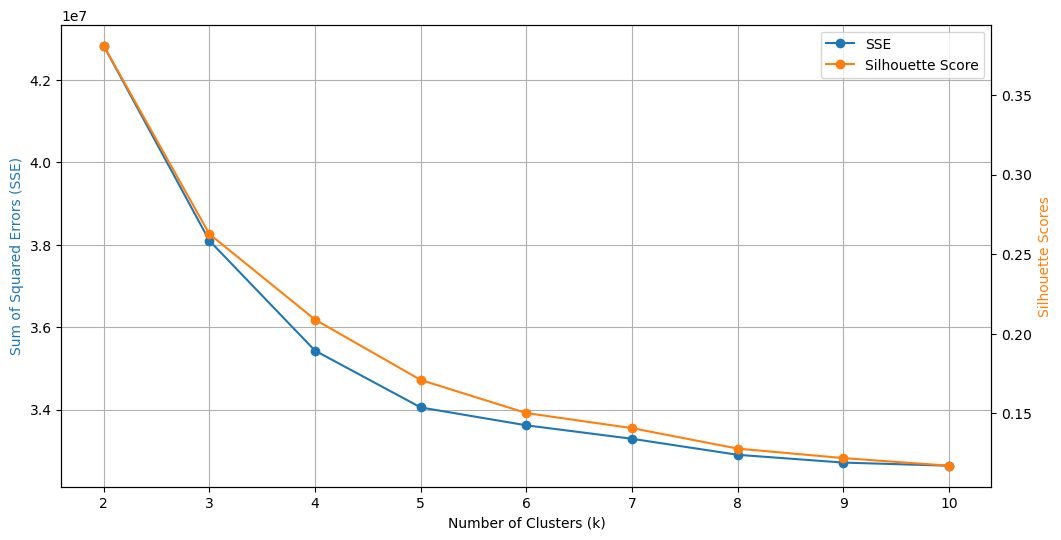

In [24]:
import matplotlib.pyplot as plt

k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
ax1.grid(True)  # Aggiungi griglia per una migliore lettura
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()

In [25]:
## Best k = 8
km= TimeSeriesKMeans(n_clusters=4, metric="euclidean",
                      max_iter=5, random_state= 0)
km.fit(X_scal)
labels_e=km.labels_
c_counts_e= pd.Series(labels_e).value_counts().sort_index()
c_counts_e


0    527
1    247
2    706
3    520
Name: count, dtype: int64

In [26]:
print('SSE KMeans Euclidean : ', km.inertia_)

labels_e = km.labels_
silhouette_e = silhouette_score(X_scal, labels_e, metric='euclidean')
print('Silhouette KMeans Euclidean : ', silhouette_e)

SSE KMeans Euclidean :  35427508.416885145
Silhouette KMeans Euclidean :  0.20891023944617004


c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

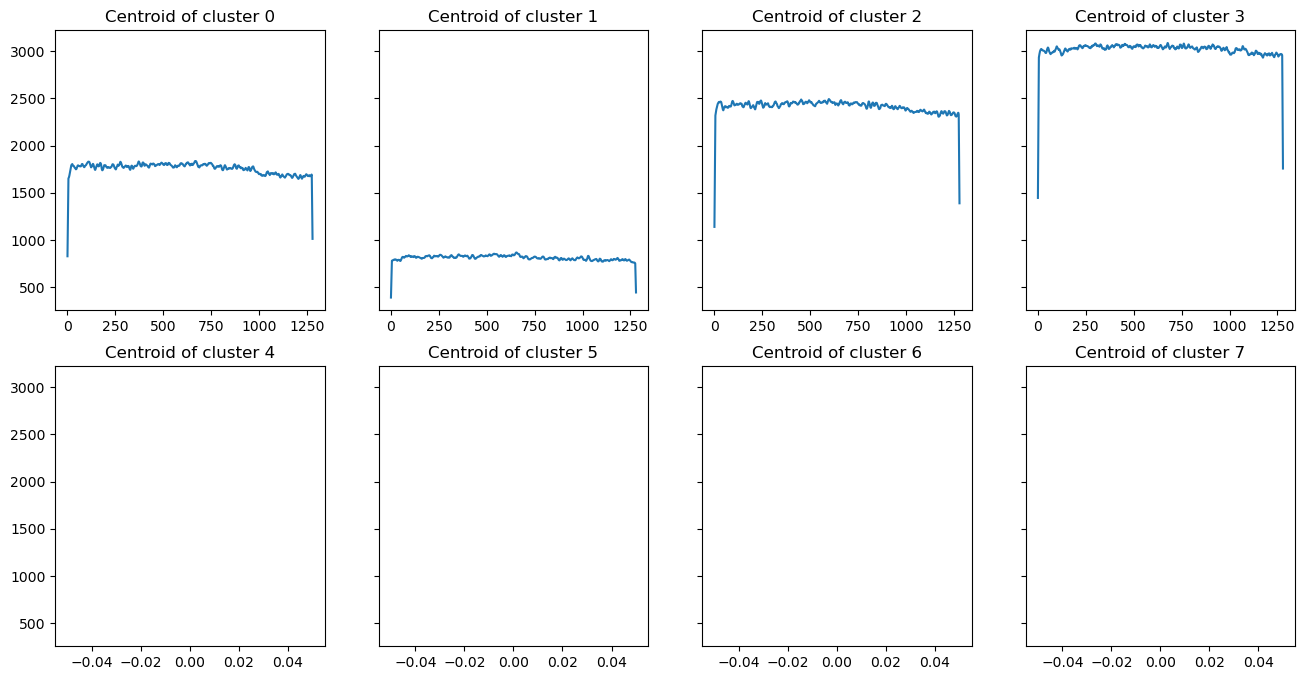

In [27]:
ax1.grid(True)
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(X_scal[np.where(km.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(X_scal[np.where(km.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1

dtw

In [ ]:
max_k=10
sse_d = []
silhouette_scores_d = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='dtw')
    kmeans.fit(X_scal)
    sse_d.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_d = kmeans.labels_
    silhouette = silhouette_score(X_scal, labels_d, metric='euclidean') 
    silhouette_scores_d.append(silhouette)
    print(f'{k}th append done')

In [ ]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_d, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_d, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()


In [ ]:
km= TimeSeriesKMeans(n_clusters=5, metric="dtw",
                      max_iter=5, random_state=42)
km.fit(X_scal)
labels_d=km.labels_
c_counts_d= pd.Series(labels_d).value_counts().sort_index()
c_counts_d

In [ ]:
print('SSE KMeans dtw : ', km.inertia_)

labels_d = km.labels_
silhouette_d = silhouette_score(X_scal, labels_d, metric='euclidean')
print('Silhouette KMeans dtw : ', silhouette_d)

In [ ]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),sharey=True)

for i in range(0,3):
    axes[0,i].plot(np.mean(X_scal[np.where(km.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(3,5):
    axes[1,j].plot(np.mean(X_scal[np.where(km.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1

# DFT

euclidean

In [28]:
max_k=10
sse_dft_e = []
silhouette_scores_dft_e = []


for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(X_dft)
    sse_dft_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_dft_e = kmeans.labels_
    silhouette = silhouette_score(X_dft, labels_dft_e, metric='euclidean')
    silhouette_scores_dft_e.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


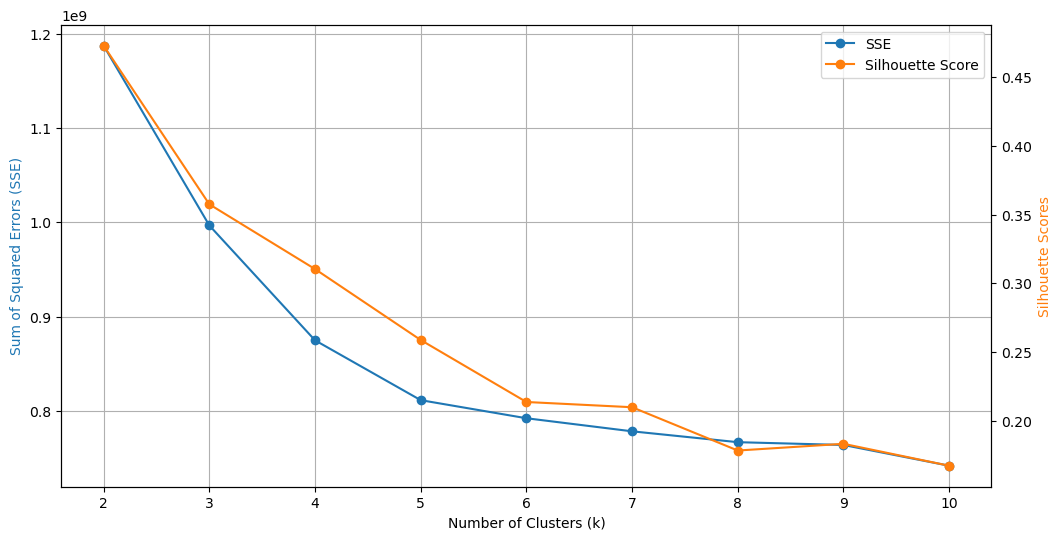

In [29]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_dft_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_dft_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()



In [31]:
km_dft= TimeSeriesKMeans(n_clusters=4, metric="euclidean",
                      max_iter=5, random_state=42)
km_dft.fit(X_dft)
labels_dft_e=km_dft.labels_
c_counts_dft_e= pd.Series(labels_dft_e).value_counts().sort_index()
c_counts_dft_e


0    721
1    247
2    535
3    497
Name: count, dtype: int64

In [32]:
print('SSE KMeans Euclidean DFT: ', km_dft.inertia_)

labels_dft_e = km_dft.labels_
silhouette_dft_e = silhouette_score(X_dft, labels_dft_e, metric='euclidean')
print('Silhouette KMeans Euclidean DFT: ', silhouette_dft_e)

SSE KMeans Euclidean DFT:  874909036.2078545
Silhouette KMeans Euclidean DFT:  0.31045400256717404


c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

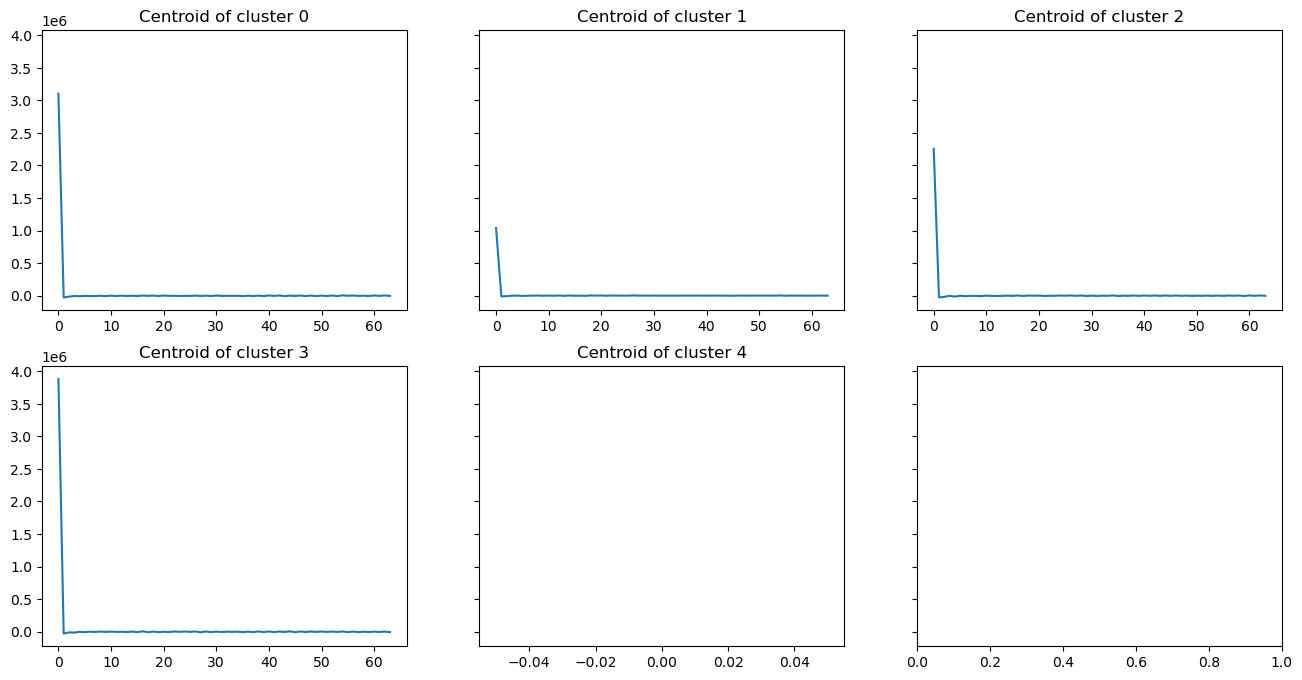

In [33]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),sharey=True)

for i in range(0,3):
    axes[0,i].plot(np.mean(X_dft[np.where(km_dft.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(3,5):
    axes[1,j].plot(np.mean(X_dft[np.where(km_dft.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1

# SAX

Euclidean

In [34]:
max_k=10
sse_sax_e = []
silhouette_scores_sax_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(X_sax)
    sse_sax_e.append(kmeans.inertia_) #kmeans.inertia gives the sse
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_sax_eu = kmeans.labels_
    silhouette = silhouette_score(X_sax, labels_sax_eu, metric='euclidean')
    silhouette_scores_sax_e.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


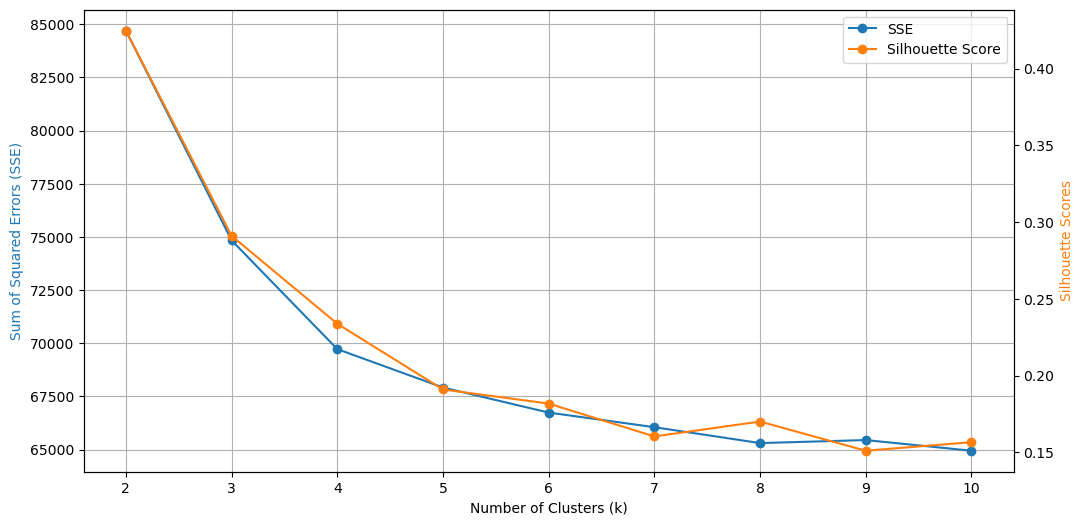

In [35]:
k_values = range(2, max_k + 1)

# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_sax_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_sax_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()

In [36]:
## Best k
km_sax= TimeSeriesKMeans(n_clusters=4, metric="euclidean", 
                      max_iter=5, random_state=0)
km_sax.fit(X_sax)
labels_sax_e = km_sax.labels_
c_counts_sax_e = pd.Series(labels_sax_e).value_counts().sort_index()
c_counts_sax_e

0    434
1    644
2    569
3    353
Name: count, dtype: int64

In [37]:
print('SSE KMeans Euclidean: ', km_sax.inertia_)

labels_sax_e = km_sax.labels_
silhouette_e = silhouette_score(X_sax, labels_sax_e, metric='euclidean')
print('Silhouette KMeans Euclidean: ', silhouette_e)

SSE KMeans Euclidean:  69726.4184237998
Silhouette KMeans Euclidean:  0.23374042570667034


c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

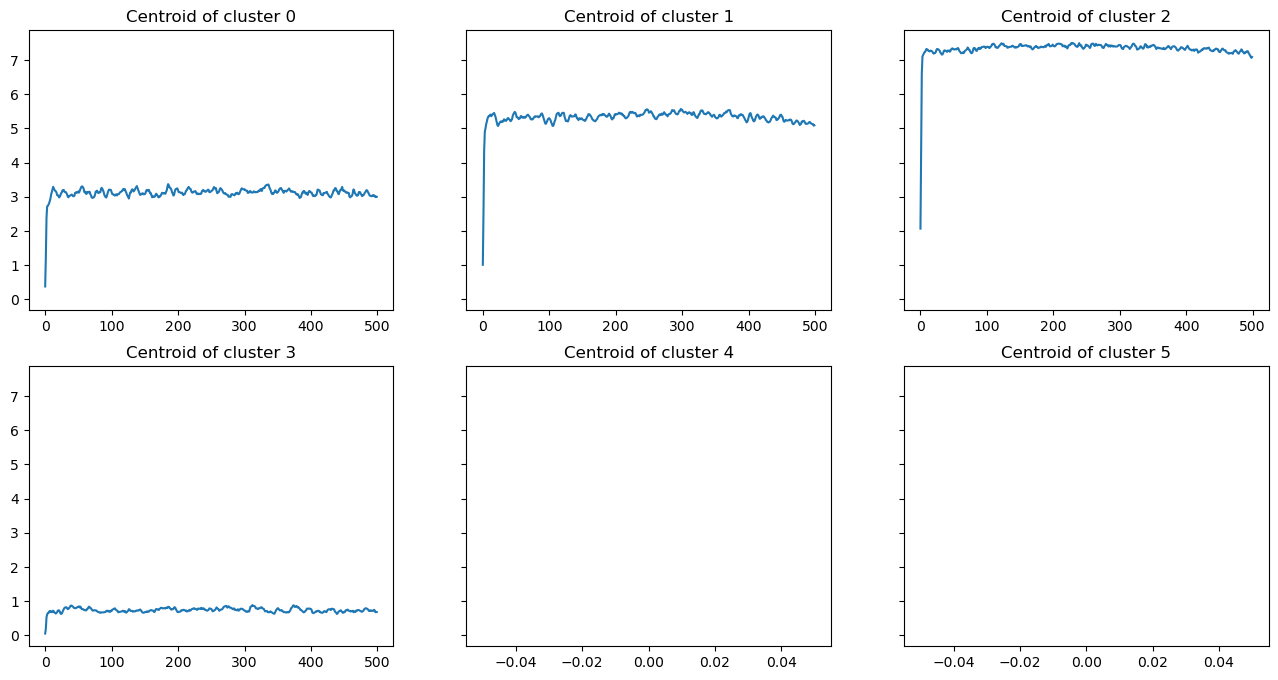

In [28]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),sharey=True)

for i in range(0,3):
    axes[0,i].plot(np.mean(X_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(3,6):
    axes[1,j].plot(np.mean(X_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1



### DTW


In [11]:
#troppo tempo per runnure, uso k=6 come per euclidean?

max_k = 10
sse_sax_d = []
silhouette_scores_sax_d = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='dtw')
    print(f'{k}th kmeans intialization done')

    kmeans.fit(X_sax)
    print(f'{k}th kmeans fit done')
    sse_sax_d.append(kmeans.inertia_)
    
    
    # Calculate silhouette coefficient
    labels_sax_d = kmeans.labels_
    silhouette = silhouette_score(X_sax, labels_sax_d, metric='euclidean')
    silhouette_scores_sax_d.append(silhouette)
    print(f'{k}th append done')

2th kmeans intialization done
2th kmeans fit done
2th append done
3th kmeans intialization done
3th kmeans fit done
3th append done
4th kmeans intialization done
4th kmeans fit done
4th append done
5th kmeans intialization done
5th kmeans fit done
5th append done
6th kmeans intialization done
6th kmeans fit done
6th append done
7th kmeans intialization done
7th kmeans fit done
7th append done
8th kmeans intialization done
8th kmeans fit done
8th append done
9th kmeans intialization done
9th kmeans fit done
9th append done
10th kmeans intialization done
10th kmeans fit done
10th append done


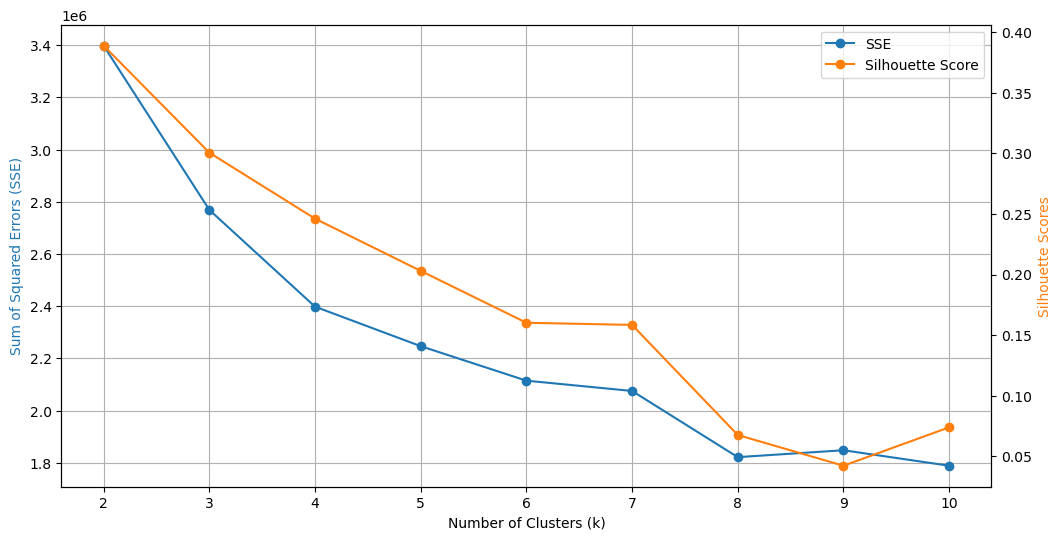

In [12]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_sax_d, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_sax_d, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True) 
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()

In [13]:
km_sax= TimeSeriesKMeans(n_clusters=7, metric="dtw", #'softdtw'
                      max_iter=5, random_state=0)
km_sax.fit(X_sax)
labels_sax_d=km_sax.labels_
c_counts_sax_d= pd.Series(labels_sax_d).value_counts().sort_index()
c_counts_sax_d

0    274
1    159
2    105
3    187
4    194
5    707
6    374
Name: count, dtype: int64

In [14]:
print('SSE KMeans DTW: ', km_sax.inertia_)

labels_sax_dtw = km_sax.labels_
silhouette_dtw = silhouette_score(X_sax, labels_sax_dtw, metric='euclidean')
print('Silhouette KMeans DTW: ', silhouette_dtw)

SSE KMeans DTW:  2075609.699378861
Silhouette KMeans DTW:  0.1584543060036885


In [ ]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8),sharey=True)

for i in range(0,3):
    axes[0,i].plot(np.mean(X_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(3,6):
    axes[1,j].plot(np.mean(X_sax[np.where(km_sax.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1

# PAA


Euclidean

In [29]:
max_k=10
sse_paa_e = []
silhouette_scores_paa_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='euclidean')
    kmeans.fit(X_paa)
    sse_paa_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_paa_e = kmeans.labels_
    silhouette = silhouette_score(X_paa, labels_paa_e, metric='euclidean')
    silhouette_scores_paa_e.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


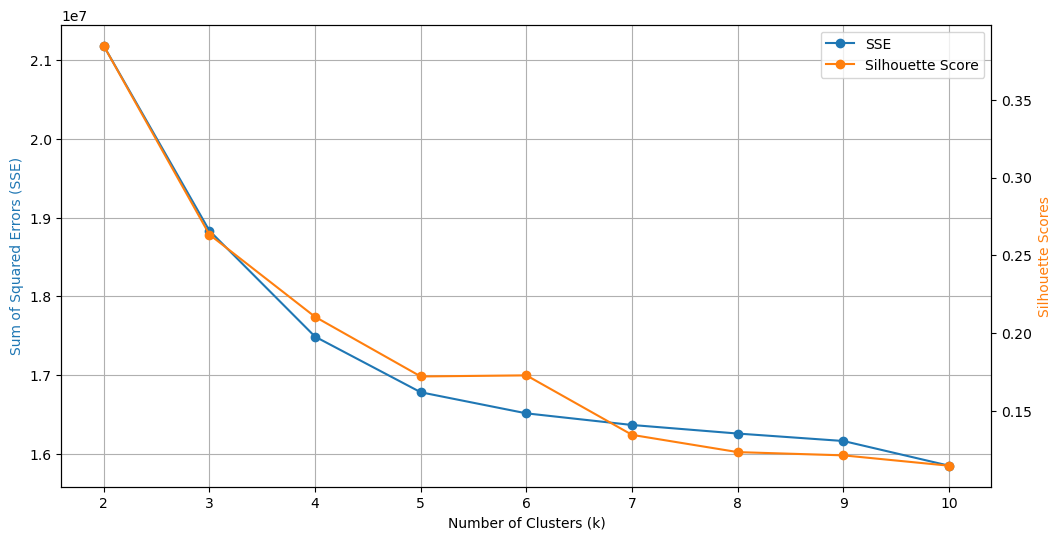

In [30]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_paa_e, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_paa_e, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()

In [35]:

km_paa= TimeSeriesKMeans(n_clusters=6, metric="euclidean", 
                      max_iter=5, random_state=42)
km_paa.fit(X_paa)
labels_paa_e=km_paa.labels_
c_counts_paa_e = pd.Series(labels_paa_e).value_counts().sort_index()
c_counts_paa_e

0    362
1    381
2    585
3    372
4    194
5    106
Name: count, dtype: int64

In [36]:
print('SSE KMeans Euclidean PAA: ', km_paa.inertia_)

labels_paa_e = km_paa.labels_
silhouette_paa_e = silhouette_score(X_paa, labels_paa_e, metric='euclidean')
print('Silhouette KMeans Euclidean PAA: ', silhouette_paa_e)

SSE KMeans Euclidean PAA:  16517648.349485062
Silhouette KMeans Euclidean PAA:  0.1728746641387383


c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HUAWEI\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1700x500 with 0 Axes>

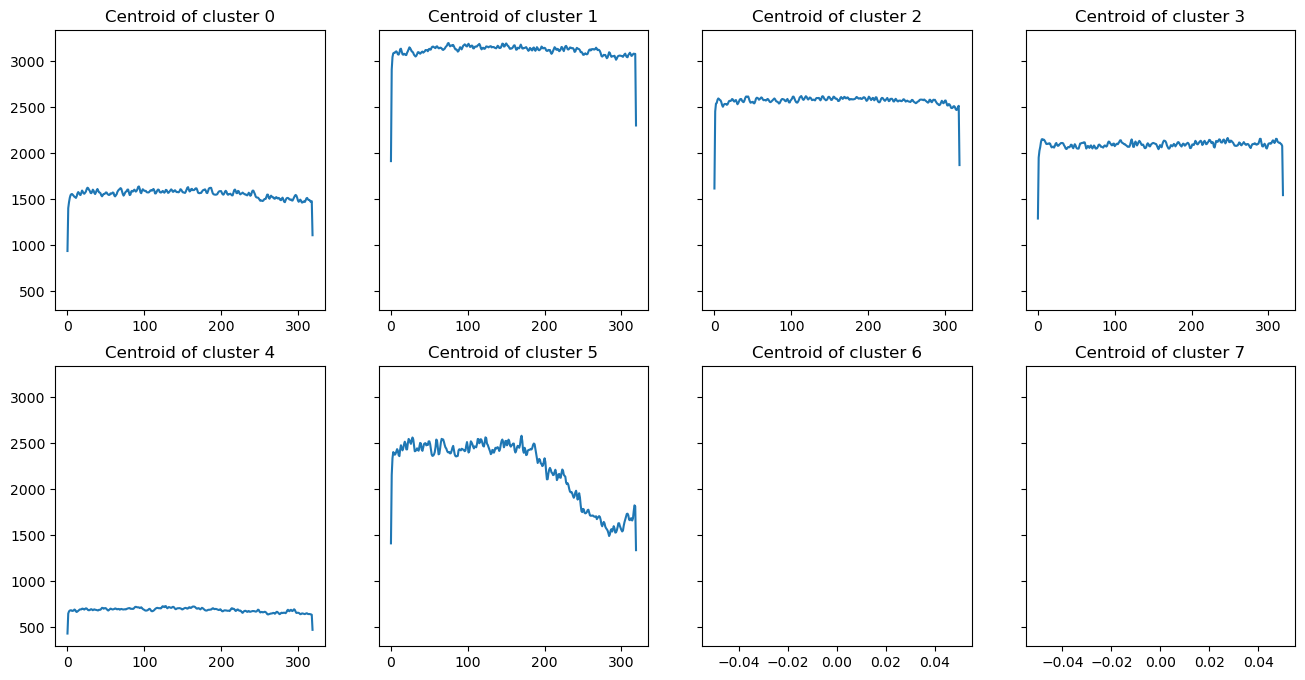

In [37]:
plt.figure(figsize=(17,5))
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

for i in range(0,4):
    axes[0,i].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
    axes[0,i].set_title(f'Centroid of cluster {i}')
j=0
for i in range(4,8):
    axes[1,j].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
    axes[1,j].set_title(f'Centroid of cluster {i}')
    j+=1


#possiamo vedere che il centroide del cluster 0 è praticamente piatto, perchè è la media di quasi tutte le TS

DTW

In [38]:
max_k=10
sse_paa_d = []
silhouette_scores_paa_d = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=42, metric='dtw')
    kmeans.fit(X_paa)
    sse_paa_d.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_paa_d = kmeans.labels_
    silhouette = silhouette_score(X_paa, labels_paa_d, metric='euclidean')
    silhouette_scores_paa_d.append(silhouette)
    print(f'{k}th append done')

2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


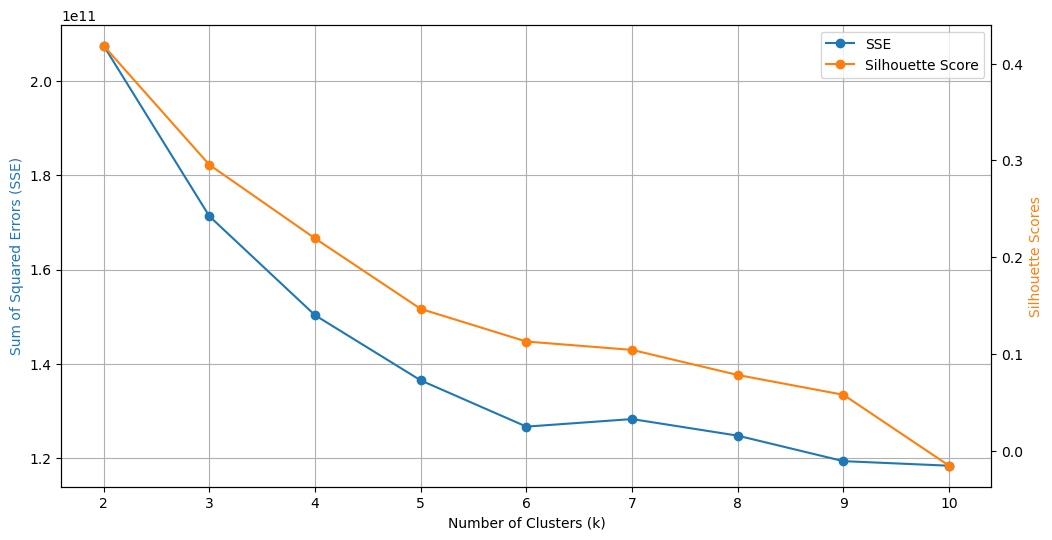

In [39]:
k_values = range(2, max_k + 1)
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SSE
ax1.plot(k_values, sse_paa_d, marker='o', color='tab:blue', label='SSE')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='tab:blue')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores_paa_d, marker='o', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Scores', color='tab:orange')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

ax1.grid(True)
#plt.title('SSE and Silhouette Scores vs. Number of Clusters')
plt.show()

In [40]:
## Best k
km_paa= TimeSeriesKMeans(n_clusters=6, metric="dtw", 
                      max_iter=5, random_state=42)
km_paa.fit(X_paa)
labels_paa_d = km_paa.labels_
c_counts_paa_d = pd.Series(labels_paa_d).value_counts().sort_index()
c_counts_paa_d

0    761
1     98
2    194
3     93
4    599
5    255
Name: count, dtype: int64

In [42]:
print('SSE KMeans DTW PAA: ', km_paa.inertia_)

labels_paa_dtw = km_paa.labels_
silhouette_paa_dtw = silhouette_score(X_paa, labels_paa_dtw, metric='euclidean')
print('Silhouette KMeans DTW PAA: ', silhouette_paa_dtw)

SSE KMeans DTW PAA:  126681965941.31125
Silhouette KMeans DTW PAA:  0.112908982036916


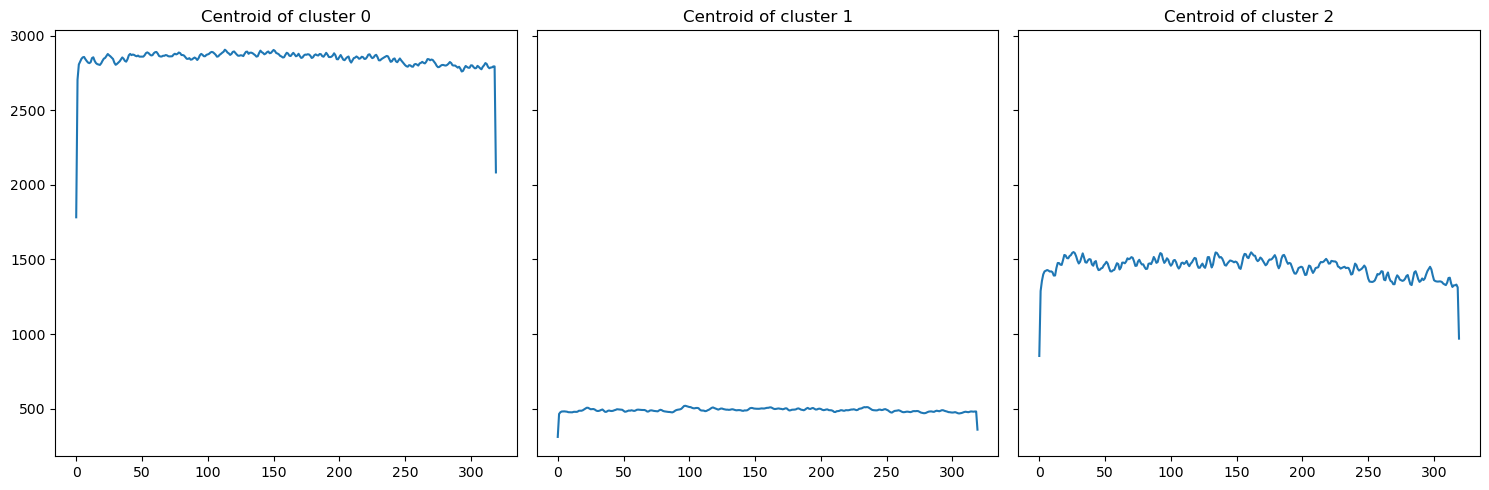

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),sharey=True)

for i in range(0,3):
    axes[i].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
    axes[i].set_title(f'Centroid of cluster {i}')
plt.tight_layout()
plt.show()

# plt.figure(figsize=(17,5))
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),sharey=True)

# for i in range(0,4):
#     axes[0,i].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
#     axes[0,i].set_title(f'Centroid of cluster {i}')
# j=0
# for i in range(4,8):
#     axes[1,j].plot(np.mean(X_paa[np.where(km_paa.labels_ == i)[0]], axis=0))
#     axes[1,j].set_title(f'Centroid of cluster {i}')
#     j+=1


# RECAP

Relatività della SSE: La SSE è una misura relativa che dipende dalla scala dei dati. Pertanto, la sua interpretazione può essere influenzata dalla scala dei dati e dalla dimensionalità dei dati. Ad esempio, in dataset con scale e dimensioni diverse, la SSE può essere influenzata dalle unità di misura e può essere difficile confrontare direttamente valori di SSE tra dataset diversi.

COME MIGLIORE E QUINDI DA RAPPRESENTARE PRENDIAMO:

 SAX e dft con EUCLIDEAN\
  perchè divide bene i cluster come numero appartenente ad ognuno, facendo così in modo di ottenere dei centroidi significativi

In [38]:
#rialleno il migliore e printo valori sse e silohuette

#1
km_dft_e= TimeSeriesKMeans(n_clusters=4, metric="euclidean",
                      max_iter=5, random_state=42)
km_dft_e.fit(X_sax) #X_sax X_dft
labels_dft_e = km_dft_e.labels_
c_counts_dft= pd.Series(labels_dft_e).value_counts().sort_index()
c_counts_dft

0    470
1    649
2    501
3    380
Name: count, dtype: int64

In [54]:
print('SSE KMeans DFT euclidean: ', km_dft_e.inertia_)

labels_dft = km_dft_e.labels_
silhouette_dft = silhouette_score(X_dft, labels_dft, metric='euclidean')
print('Silhouette KMeans DFT euclidean: ', silhouette_dft)

SSE KMeans DFT euclidean:  69865.15004180244
Silhouette KMeans DFT euclidean:  0.25601862216656507


In [39]:
km_dft_e.cluster_centers_.shape

(4, 1, 500)

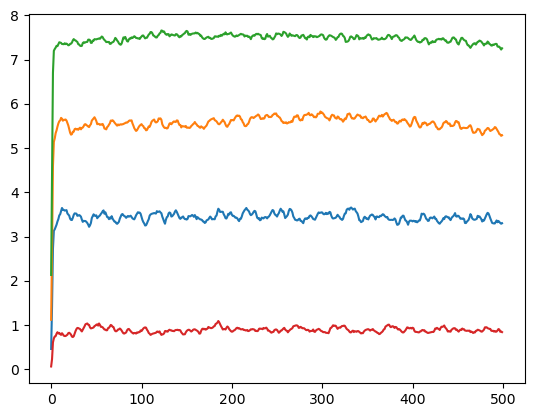

In [43]:
#lo visualizzo per esteso vedi df melt o cosi 

plt.plot(np.squeeze(km_dft_e.cluster_centers_).T)
plt.show()

In [41]:
X_sax = X_sax.squeeze()
X_sax.shape

(2000, 500)

In [42]:
#Ottengo quali sono le TS più vicine ai centroidi dei cluster individuati. Su queste poi saranno individuati motifs and discords
print(getNearestTS(X_sax, km_dft_e.cluster_centers_))

Centroid 0: Nearest Time Series Index = 1678
Centroid 1: Nearest Time Series Index = 1657
Centroid 2: Nearest Time Series Index = 1632
Centroid 3: Nearest Time Series Index = 1647
None


In [59]:
centroids = km_dft_e.cluster_centers_
c1 = centroids[3]
c1

array([[0.06329114, 0.23291139, 0.60759494, 0.69873418, 0.74177215,
        0.74936709, 0.80506329, 0.83797468, 0.80759494, 0.82278481,
        0.79493671, 0.77721519, 0.81518987, 0.78987342, 0.75949367,
        0.75189873, 0.75189873, 0.76708861, 0.78227848, 0.81772152,
        0.82531646, 0.80759494, 0.78227848, 0.73924051, 0.72911392,
        0.74683544, 0.80506329, 0.86329114, 0.90886076, 0.93417722,
        0.93164557, 0.91898734, 0.90886076, 0.87848101, 0.8556962 ,
        0.89367089, 0.92911392, 0.9721519 , 1.01772152, 1.0278481 ,
        1.03544304, 1.00759494, 1.00253165, 0.94683544, 0.92405063,
        0.92911392, 0.93670886, 0.94683544, 0.97721519, 0.98734177,
        1.00759494, 1.01518987, 0.98734177, 1.03544304, 1.00253165,
        0.95949367, 0.95949367, 0.94936709, 0.92405063, 0.89873418,
        0.89620253, 0.88101266, 0.8835443 , 0.93164557, 0.93670886,
        0.96962025, 1.00253165, 0.98987342, 0.96202532, 0.95443038,
        0.89873418, 0.86329114, 0.85822785, 0.87

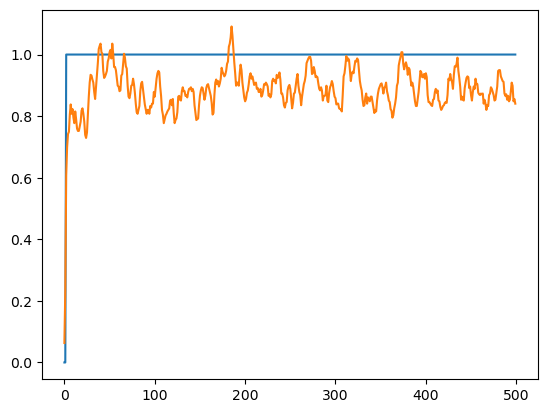

In [63]:
plt.plot(X_sax[1647], label='Most similar TS to centroid 3')
plt.plot(c1.T)
plt.show()

<h3>DIMENSIONALITY REDUCTION</h3>

Usare almeno due tecniche di dimensionality reduction per visualizzare i cluster. <br>


In [ ]:
#CAMBIA SOLO QUESTI PARAMETRI PER LE TRE VISUALIZZAZIONI

X = X_sax 
labels = labels_dft

In [65]:
unique_labels = list(set(labels))
unique_labels

[0, 1, 2, 3]

#### 1 - tsne

In [66]:
from sklearn.manifold import TSNE

In [67]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(2000, 2)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14992\34275211.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Or any other colormap name you prefer


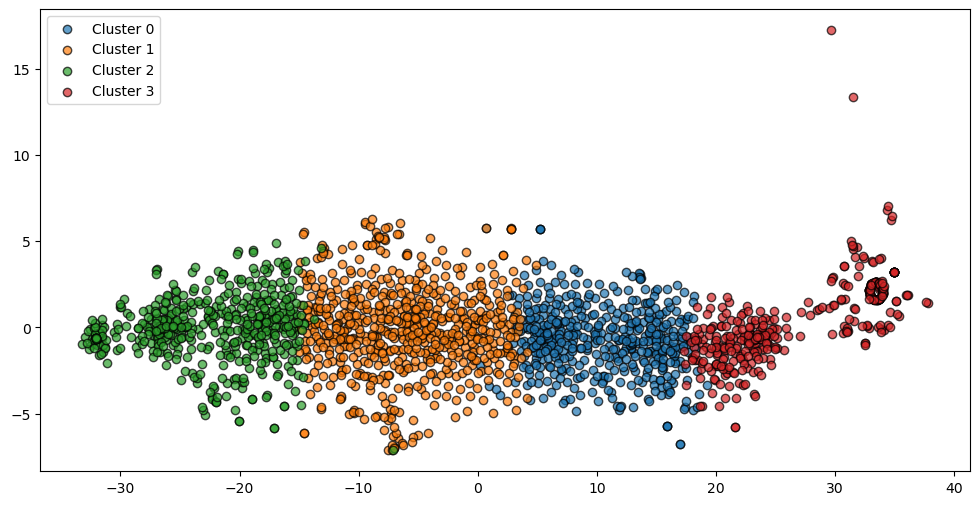

In [68]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(12,6))
cmap = plt.cm.get_cmap('tab10')  # Or any other colormap name you prefer

for cluster_label in set(labels):
    mask = (labels == cluster_label)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()

#### 2- pca

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)
X_train_pca.shape

(2000, 2)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14992\3964333623.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


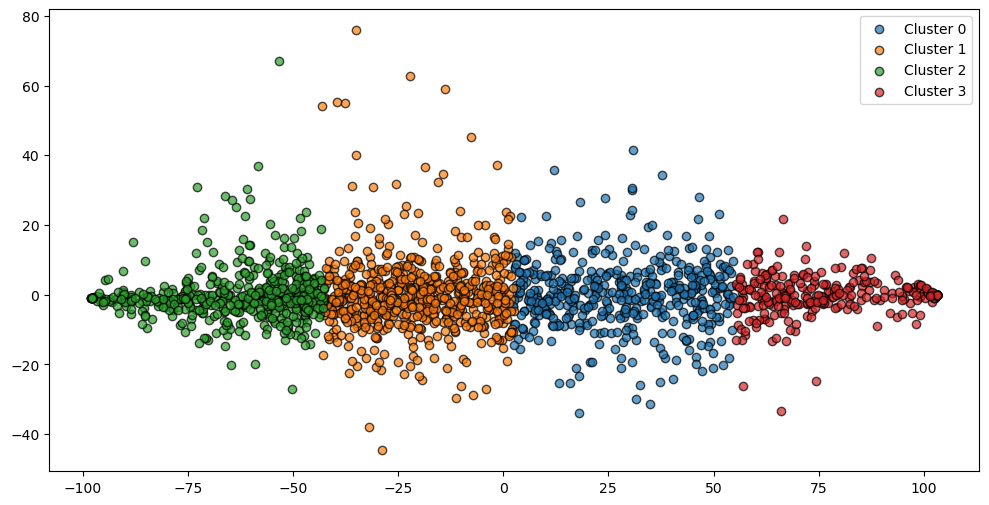

In [71]:
plt.figure(figsize=(12,6))
#cmap = plt.cm.get_cmap('tab10', len(set(labels_dft)))
cmap = plt.cm.get_cmap('tab10')

for cluster_label in set(labels):
    mask = (labels == cluster_label)
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()


#### 3 - isomap

In [72]:
from sklearn.manifold import Isomap

In [73]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(2000, 2)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14992\2281020100.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


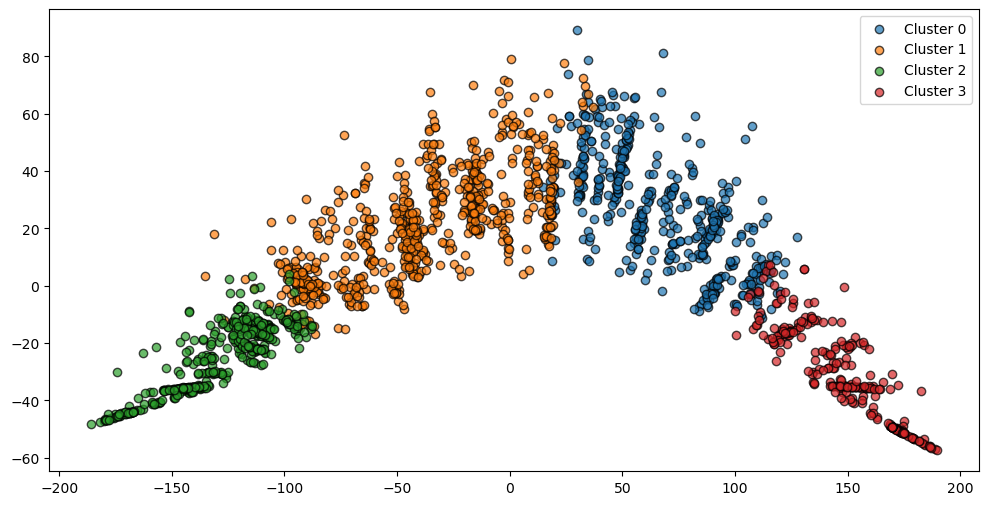

In [74]:
plt.figure(figsize=(12,6))
#cmap = plt.cm.get_cmap('Paired', len(set(labels)))
cmap = plt.cm.get_cmap('tab10')

for cluster_label in set(labels):
    mask = (labels == cluster_label)
    plt.scatter(X_train_iso[mask, 0], X_train_iso[mask, 1], label=f'Cluster {cluster_label}', color=cmap(cluster_label), edgecolor='k', alpha=0.7)
plt.legend()
plt.show()

<h3>ANALYSIS OF THE CLUSTERS</h3>

Provo ad analizzare i cluster, la loro composizione rispetto a emozioni, speech/song e M/F

In [75]:
# y_train=pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')
y = np.loadtxt(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\y.txt', dtype=str)
y.shape

(2000,)

In [76]:
# Assuming y is a Series or array
y = pd.DataFrame(y, columns=['genre'])  # Change 'Original_Column_Name' to the actual name of your original column

# Assuming labels is a list or array containing cluster labels
y['Cluster_Labels'] = labels
y

,genre,Cluster_Labels
0,emo,1
1,emo,1
2,emo,2
3,emo,1
4,emo,1
...,...,...
1995,world-music,1
1996,world-music,0
1997,world-music,3
1998,world-music,1


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14992\438795749.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired', len(pivot_df.columns))


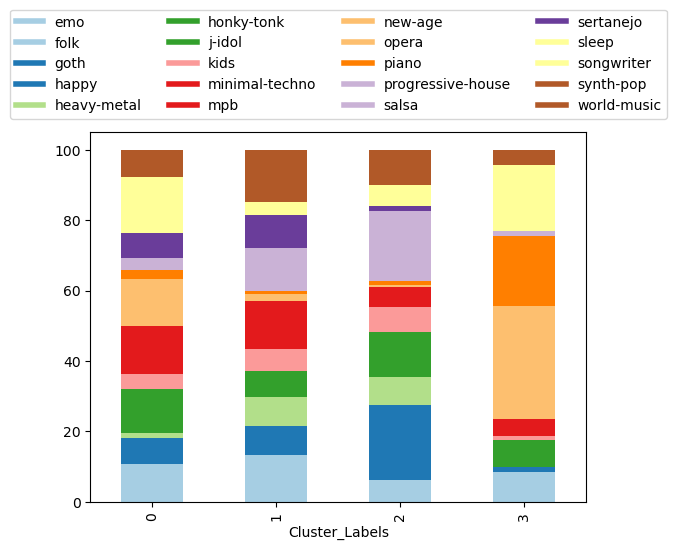

In [80]:
grouped_data = y.groupby(['Cluster_Labels', 'genre']).size()
cluster_totals = grouped_data.groupby('Cluster_Labels').sum()
percentages = grouped_data.div(cluster_totals, level='Cluster_Labels') * 100
pivot_df = percentages.reset_index().pivot(index='Cluster_Labels', columns='genre', values=0)

cmap = plt.cm.get_cmap('Paired', len(pivot_df.columns))
ax = pivot_df.plot(kind='bar', stacked=True, color=[cmap(i) for i in range(len(pivot_df.columns))])
legend_labels = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=label) for i, label in enumerate(pivot_df.columns)]

ax.legend(handles=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=False, ncol=4)
